# Unit 5 - Financial Planning

In [184]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [185]:
# Load .env enviroment variables
load_dotenv('ALPACA.ENV')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [186]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [187]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [188]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_response_data

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_response_data


# Compute current value of my crpto
btc_current_value = btc_response_data['data']['1']['quotes']['USD']['price']
eth_current_value = eth_response_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_current_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_current_value:0.2f}")

The current value of your 1.2 BTC is $28998.00
The current value of your 5.3 ETH is $1958.81


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [189]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [190]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca_end_point = os.getenv("ALPACA_END_POINT")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2",
    base_url = alpaca_end_point)

In [191]:
# Format current date as ISO format
today = pd.Timestamp("2023-04-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                            \
                             open   high    low  close   volume trade_count   
timestamp                                                                     
2023-04-12 04:00:00+00:00  100.17  100.2  99.61  99.93  7226122       33545   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-04-12 04:00:00+00:00  99.885733  411.87  412.17  407.44  408.05   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-04-12 04:00:00+00:00  86440377      639926  409.706051

In [192]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.93
Current SPY closing price: $408.05


In [193]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20402.50
The current value of your 200 AGG shares is $19986.00


### Savings Health Analysis

In [194]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = btc_current_value + eth_current_value  #adding together all crypto
stock_bond_assets = my_agg_value + my_agg_value #adding together all stocks and bonds

value_data = {
    'amount': [crypto_assets, stock_bond_assets],
    'asset': ["crypto", "shares"]
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data).set_index('asset')

# Display savings DataFrame
display(df_savings)

,amount
asset,
crypto,30956.81
shares,39972.00


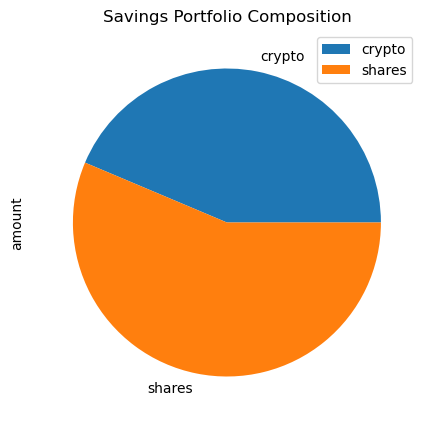

In [195]:
# Plot savings pie chart
pie_chart = df_savings.plot.pie(y= 'amount', title="Savings Portfolio Composition", figsize=(5,5))

In [196]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
#If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")

#If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
elif total_savings == emergency_fund:
    print(f"You have reached your financial goal!")

#If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.
else:
    print(f"You're ${emergency_fund - total_savings:0.2f} away from achieving your financial goal. Keep saving!")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [223]:
# Set start and end dates of five years back from today.

# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2012-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()

In [224]:
# Get 5 years' worth of historical data for SPY and AGG
df_portfolio_5_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df


df_portfolio_5_year.head

<bound method NDFrame.head of                              open      high      low     close    volume  \
timestamp                                                                  
2015-12-01 05:00:00+00:00  108.54  108.8400  108.430  108.8200   4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.610  108.6850   2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.810  107.8900   4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.000  108.2400   2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.230  108.4000   2143773   
...                           ...       ...      ...       ...       ...   
2017-04-25 04:00:00+00:00  237.91  238.9500  237.810  238.5200  76698265   
2017-04-26 04:00:00+00:00  238.51  239.5300  238.350  238.4400  84702455   
2017-04-27 04:00:00+00:00  238.77  238.9500  237.980  238.6001  57410326   
2017-04-28 04:00:00+00:00  238.90  238.9300  237.930  238.1200  63532845   
2017-05-01 04:00:00+00:00  238.68  239.1700  238.195  238.

In [225]:
# Separate ticker data
AGG = df_portfolio_5_year[df_portfolio_5_year['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio_5_year[df_portfolio_5_year['symbol']=='SPY'].drop('symbol', axis=1)




# Concatenate the ticker DataFrames
df_portfolio_5_year = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_portfolio_5_year.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.820  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.685  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.890  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.240  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.400  2143773   

                                                       SPY            \
                          trade_count        vwap     open      high   
timestamp                                                              
2015-12-01 05:00:00+00:00       15562  108.754152  209.440  210.8200   
2015-12-02 05:00:00+00:00       11581  108.684692  210.615  211.0000   
2015-12-03 05:00:00+00:00       16801  108.040315  208.830  209.1500   
2015-12-04 05:00:00+00:00        9796  108.192232  206.080  209.9700   
2015-12-07 05:00:00+00:00        9104  108.460067  209.230  209.7295   

                                                                     \
                                low    close     volume trade_count   
timestamp                                                             
2015-12-01 05:00:00+00:00  209.1100  210.680   97858418      337780   
2015-12-02 05:00:00+00:00  208.2300  208.529  108069059      367013   
2015-12-03 05:00:00+00:00  204.7511  205.610  166224154      546768   
2015-12-04 05:00:00+00:00  205.9300  209.620  192878747      556731   
2015-12-07 05:00:00+00:00  207.2000  208.350  102027111      374705   

                                       
                                 vwap  
timestamp                              
2015-12-01 05:00:00+00:00  209.921410  
2015-12-02 05:00:00+00:00  209.563055  
2015-12-03 05:00:00+00:00  206.878936  
2015-12-04 05:00:00+00:00  208.178631  
2015-12-07 05:00:00+00:00  208.276128

In [226]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Set number of simulations
num_sim= 500
weights= [0.40, 0.60]
num_years= 30

In [227]:
# Printing the simulation input data
MC_portfolio = MCSimulation(
    portfolio_data = df_portfolio_5_year,
    weights = weights,
    num_simulation = num_sims,
    num_trading_days = 252*num_years
)

In [228]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sakes\financial_planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003187,1.000656,1.000717,0.990992,1.009081,1.007796,1.001374,1.003466,0.999188,0.999123,...,1.000368,0.995068,1.000611,0.992061,1.000012,0.998846,1.011750,1.000572,1.002109,1.002465
2,1.008683,0.993794,1.008841,1.002644,1.013872,1.011458,0.999803,1.004078,1.000537,1.004431,...,1.005752,1.012576,0.996278,0.993533,1.006157,0.992398,1.015883,1.010855,1.001710,1.007564
3,1.007198,0.990130,1.009122,1.007159,1.010408,1.011029,0.993960,1.008761,1.009459,1.007471,...,1.008341,1.009986,1.003537,0.990558,1.004311,0.991161,1.014489,1.010101,1.005751,1.016335
4,1.002832,0.984528,1.004324,1.009673,1.012735,0.997562,0.996379,1.004389,1.009894,1.009017,...,1.016806,1.005705,1.008113,0.988392,1.008474,0.996386,1.017811,1.005321,1.005836,1.009154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.285015,7.968640,8.257540,6.810655,3.406235,4.035031,4.937671,3.533762,8.321527,4.251364,...,5.009716,3.054042,4.052968,2.556444,4.821461,3.145597,5.512909,8.646394,8.997043,3.593608
7557,5.269313,8.004876,8.267620,6.802844,3.389272,3.993493,4.984594,3.532679,8.298170,4.260199,...,5.010218,3.057234,4.038929,2.543979,4.837659,3.134397,5.535384,8.765002,8.994108,3.592343
7558,5.254931,8.003828,8.248961,6.796249,3.392414,4.001118,4.956355,3.516602,8.328648,4.242982,...,5.003005,3.072323,4.068212,2.557458,4.840889,3.123837,5.537303,8.770725,9.021047,3.577017
7559,5.247289,8.058398,8.260556,6.780943,3.425544,4.003524,4.908647,3.538242,8.276335,4.228516,...,4.940404,3.062014,4.089711,2.576568,4.858798,3.096947,5.547288,8.755204,9.034684,3.569256


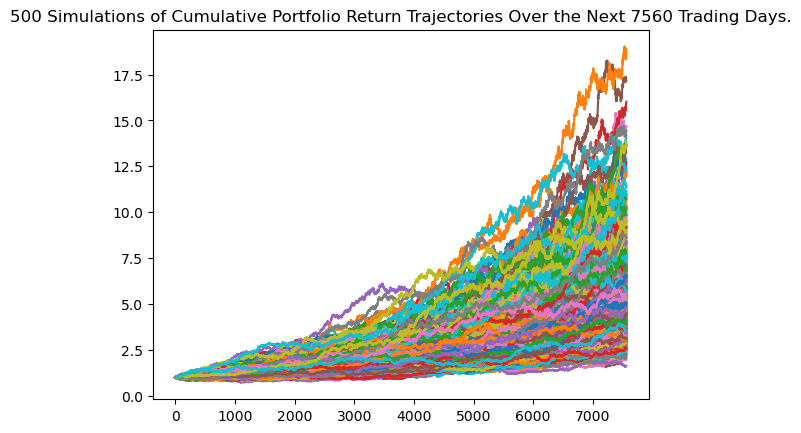

In [229]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()

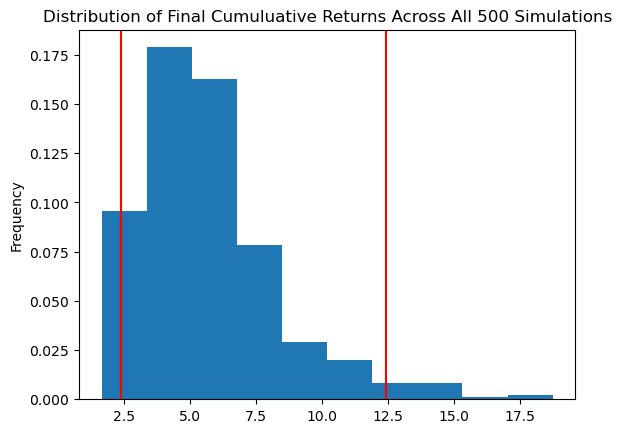

In [230]:
# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio.plot_distribution()

### Retirement Analysis

In [232]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

count           500.000000
mean              5.680358
std               2.567203
min               1.634960
25%               3.870054
50%               5.263530
75%               6.787008
max              18.745440
95% CI Lower      2.350854
95% CI Upper     12.431105
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [233]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47017.07 and $248622.1


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [234]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $70525.61 and $372933.14


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [235]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500
MC_portfolio_5y = MCSimulation(
    portfolio_data = df_portfolio_5_year,
    weights = [0.8,0.2],  #changed weights of stocks vs. bonds for a more aggressive/riskier portfolio
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [236]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sakes\financial_planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002144,1.000854,1.000955,1.001400,0.998092,1.002800,0.999935,1.000798,1.003128,0.998649,...,0.997750,0.998340,0.998622,1.002027,0.999715,0.999565,1.000030,0.999322,1.000325,1.003919
2,1.002554,1.000462,1.004554,1.004264,0.995376,1.001151,1.004124,1.000894,1.004471,0.997306,...,0.999334,0.995155,0.995692,0.998937,1.001318,0.997491,1.001842,0.993854,0.999855,1.005344
3,1.002523,1.003488,1.007142,1.007751,0.991763,1.002601,1.001791,0.998564,1.005293,0.997593,...,1.001586,0.995456,0.997444,1.001287,1.003848,1.000981,1.005108,0.991776,0.998696,1.007459
4,1.002644,1.002407,1.011278,1.009614,0.990813,1.002587,1.002289,0.998798,1.007067,1.000303,...,1.005006,0.996644,0.995437,1.001182,1.001234,1.000051,1.004138,0.993555,1.001059,1.011341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.050422,1.135068,0.942928,1.178687,1.068396,1.094903,1.038100,1.105017,1.054940,1.222869,...,1.179831,1.046960,1.250087,1.193534,1.034032,1.103377,1.138721,1.034974,1.167165,1.053746
1257,1.049512,1.132905,0.943861,1.179757,1.068189,1.095564,1.039815,1.102853,1.055761,1.219655,...,1.175557,1.046227,1.252854,1.193510,1.033627,1.098880,1.140507,1.035675,1.172004,1.053099
1258,1.050302,1.131222,0.945666,1.178569,1.062796,1.098395,1.039121,1.100073,1.049625,1.212941,...,1.176164,1.045876,1.252711,1.194853,1.031164,1.101438,1.137951,1.033026,1.173771,1.053614
1259,1.051092,1.132481,0.946565,1.179902,1.059148,1.095116,1.035438,1.100096,1.048506,1.210914,...,1.174113,1.043863,1.248607,1.192912,1.032112,1.106534,1.134928,1.035654,1.173826,1.051858


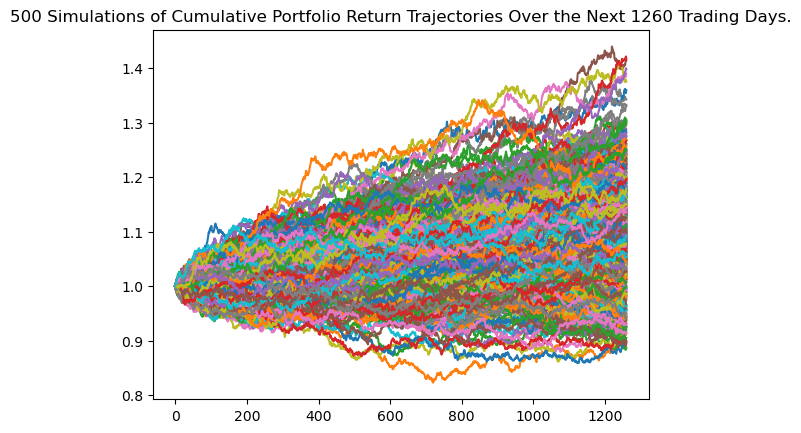

In [237]:
# Plot simulation outcomes
line_plot_5y = MC_portfolio_5y.plot_simulation()

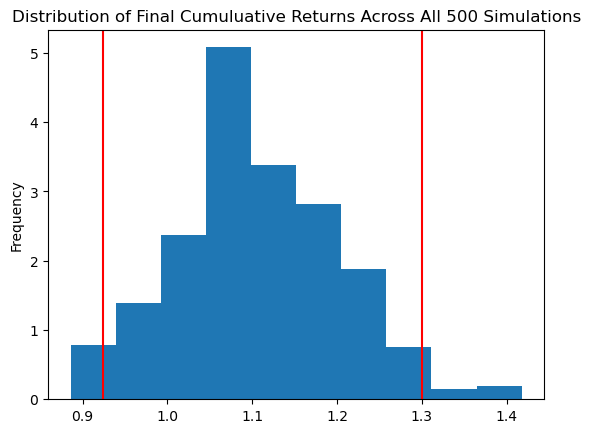

In [238]:
# Plot probability distribution and confidence intervals
dist_plot_5y = MC_portfolio_5y.plot_distribution()

In [239]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_5y = MC_portfolio_5y.summarize_cumulative_return()


# Print summary statistics
print(summary_tbl_5y)

count           500.000000
mean              1.106659
std               0.096402
min               0.886013
25%               1.047623
50%               1.097342
75%               1.170810
max               1.417583
95% CI Lower      0.924521
95% CI Upper      1.300230
Name: 1260, dtype: float64


In [242]:
# Set initial investment
initial_investment = 20000  #same initial investment as the 30 year retirement plan

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_tbl_5y[8]*initial_investment,2)
ci_upper_five = round(summary_tbl_5y[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18490.41 and $26004.6


### Ten Years Retirement Option

In [243]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500
MC_portfolio_10y = MCSimulation(
    portfolio_data = df_portfolio_5_year,
    weights = [0.8,0.2],  #changed weights of stocks vs. bonds for a more aggressive/riskier portfolio
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [244]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sakes\financial_planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000431,1.002622,1.000954,0.998591,0.999731,0.996255,1.003760,1.000625,1.002243,0.999048,...,0.997369,0.998828,0.999948,1.004549,0.998152,0.999534,0.998696,1.001933,0.997048,0.999601
2,0.997968,1.002181,0.998197,0.998709,1.001640,1.001341,1.003214,1.002911,1.006558,0.997069,...,0.998603,0.997201,1.000054,1.003557,0.994380,0.999808,0.997381,1.006014,0.998675,1.000329
3,0.998117,1.003503,0.999659,0.998522,1.004989,1.000742,1.004564,1.005536,1.009743,1.000210,...,0.995975,0.997220,0.999027,1.006033,0.995325,1.001941,0.994143,1.005411,1.000531,1.001623
4,1.000681,1.000786,0.996681,0.998981,1.005369,1.000327,1.002225,1.004649,1.007050,1.000141,...,0.993599,0.995743,1.000665,1.002182,0.994656,1.004862,0.995335,1.005496,0.999153,1.000569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.156445,1.248409,1.093448,1.068206,1.485732,1.150954,1.126299,1.289780,1.138161,1.155788,...,1.257800,1.143750,1.207971,1.136474,1.206852,0.997855,1.106889,1.195852,1.342907,1.191077
2517,1.159090,1.252701,1.095943,1.067442,1.485032,1.149955,1.130539,1.291060,1.133759,1.154102,...,1.261488,1.142650,1.204704,1.136760,1.207343,1.001466,1.107215,1.193308,1.338803,1.188718
2518,1.161457,1.253825,1.095647,1.068738,1.486147,1.151707,1.129188,1.294465,1.135504,1.155719,...,1.257463,1.142191,1.204174,1.137760,1.204573,1.000456,1.105992,1.194307,1.338029,1.187110
2519,1.163527,1.252297,1.097561,1.066117,1.487643,1.146674,1.128934,1.294029,1.136215,1.156985,...,1.258430,1.143614,1.205383,1.138006,1.206669,1.000205,1.107513,1.188875,1.335682,1.184888


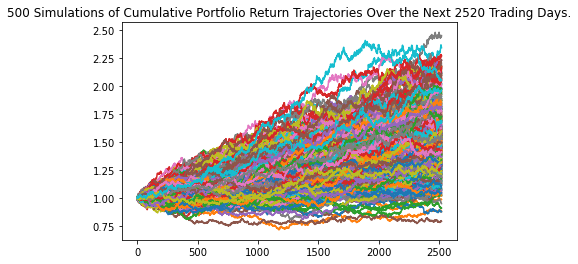

In [32]:
# Plot simulation outcomes
line_plot_10y = MC_portfolio_10y.plot_simulation()

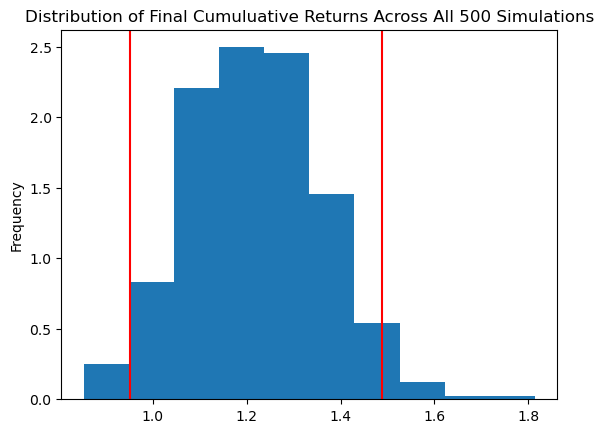

In [245]:
# Plot probability distribution and confidence intervals
dist_plot_10y = MC_portfolio_10y.plot_distribution()

In [246]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_10y = MC_portfolio_10y.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl_10y)

count           500.000000
mean              1.217724
std               0.141430
min               0.852929
25%               1.107678
50%               1.214766
75%               1.314942
max               1.814340
95% CI Lower      0.950154
95% CI Upper      1.488066
Name: 2520, dtype: float64


In [247]:
# Set initial investment
initial_investment = 20000  #same initial investment as the 30 year retirement plan

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_tbl_10y[8]*initial_investment,2)
ci_upper_ten = round(summary_tbl_10y[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $19003.08 and $29761.32
